In [1]:
import pandas as pd
house=pd.read_excel(r"house.xlsx")
house.head()

d:\Python\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


```
属性信息（按顺序）：
-CRIM:按城镇划分的犯罪率
-ZN:划分为25000平方英尺以上地块的住宅用地比例。
-INDUS:每个城镇非零售商业英亩数的比例
-CHAS: Charles River伪变量（如果域边界为河流，则为1；否则为0）
-NOX:氮氧化物浓度（百万分之一）
-RM：每个住宅的平均房间数
-AGE:1940年之前建造的自住单元的年龄比例
-DIS:加权到波士顿五个就业中心的距离
-RAD:径向公路可达性RAD指数
-TAX:每10000美元的全额财产税税率
-PTRATIO:按城镇划分的师生比例
-B: 1000（Bk-0.63）^2，其中Bk是按城镇划分的黑人比例
-LSTA:T%人口地位较低
-MEDV:自住房屋的中值（单位：1000美元）
```

In [3]:
#数据集中有一个变量 B，是基于种族自隔离对房价有积极影响的假设构建的，这在伦理上是不可接受的。load_boston 函数由于伦理问题已被从 scikit-learn 中移除。

In [2]:
#取出回归分析的特征属性X
X=house.iloc[:,:-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
#取回归分析的目标变量Y
Y=house["target"]
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [4]:
#数据框，含X与Y
XY=house

# 属性相关性分析

In [5]:
#求各属性（列）之间的相关性系数，按 目标 列的降序排列
XY.corr().sort_values(by='target',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
target,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [6]:
#求RM与target之间的相关性系数，按 目标 列的降序排列
XY.corr().sort_values(by='target',ascending=False)[['RM','target']] #只看RM,target列

,RM,target
target,0.695360,1.000000
RM,1.000000,0.695360
ZN,0.311991,0.360445
B,0.128069,0.333461
DIS,0.205246,0.249929
CHAS,0.091251,0.175260
AGE,-0.240265,-0.376955
RAD,-0.209847,-0.381626
CRIM,-0.219247,-0.388305
NOX,-0.302188,-0.427321


# 构建回归模型

In [8]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt

## 1 一元回归

模型评估得分： 0.5383003344910231


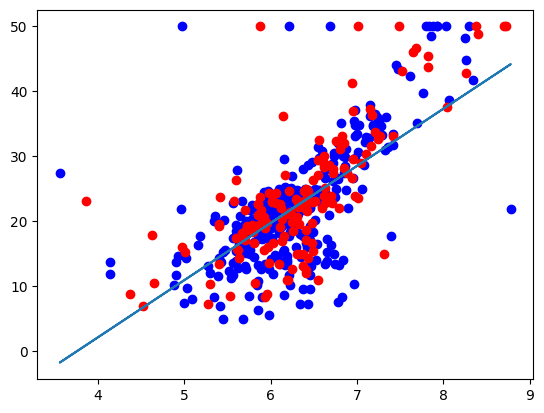

In [9]:
#取RM列做为回归模型的特征属性
x=house.iloc[:,5]               #取RM属性
y=house['target']

x=pd.DataFrame(x)               #Series数据转为二维的方法
#x=x.reshape(-1,1)               #reshape处理的是numpy数组，本题不能用reshape转为二维

#划分数据集为训练与测试
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

#训练回归模型
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)                   #用训练集训练模型

#用测试集评估生成的模型
score=lr.score(x_test,y_test)             #用测试集评价模型
print("模型评估得分：",score)


#用画图观察结果
y_pre=lr.predict(x)                           #用训练的模型计算 x 对应的 y ，用于画 回归线

plt.scatter(x_train,y_train,color='blue')     #训练集，蓝点图
plt.scatter(x_test,y_test,color='red')        #测试集，红点图
plt.plot(x,y_pre)                             #回归模型折线图


In [11]:
#有些点离回归线很远，例如，target>=50的点。原因：可能是其它属性导致的
#下面考虑在多属性参与拟合的情况，不删除其它属性

## 2 多元回归

模型评估得分： 0.699625577298312


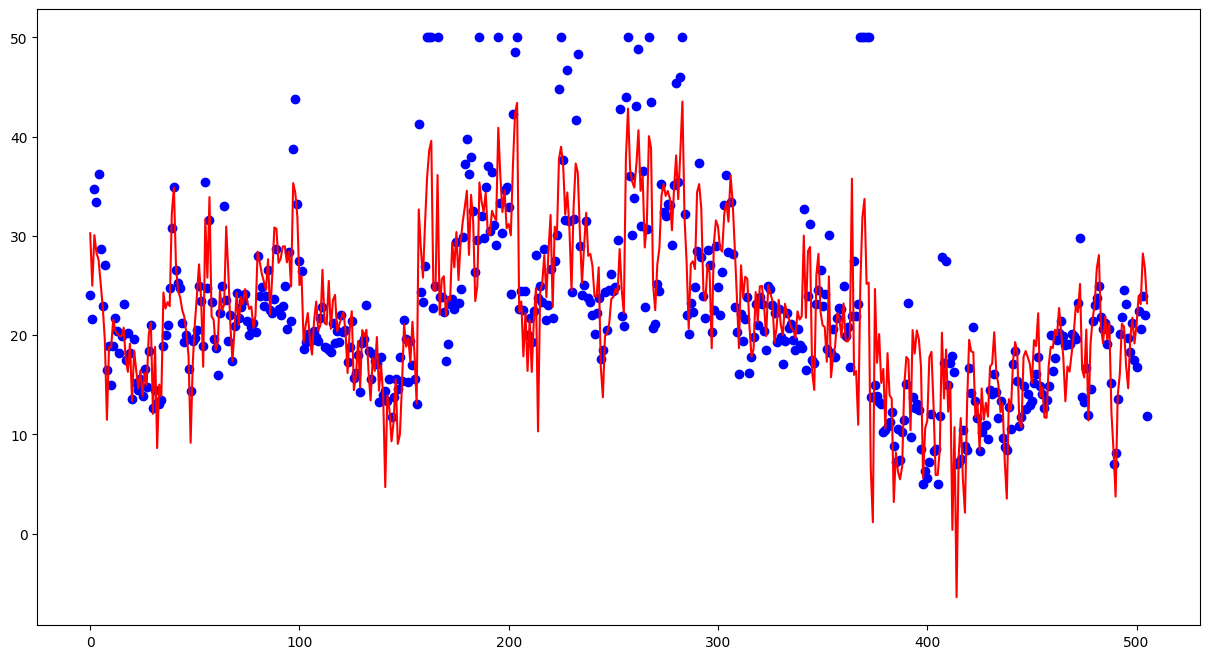

In [10]:
X=house.iloc[:,:-1]               #取所有特征属性列
y=house['target']

#划分训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
#用训练集生成模型
lr2=linear_model.LinearRegression()
lr2.fit(x_train,y_train)                   
#用测试集评估模型
score=lr2.score(x_test,y_test)

#用模型预测房价
Y_pre=lr2.predict(X)
plt.figure(figsize=(15,8))

#画图对比原房价与预测的房价，因X是多维，无法在二维图上绘制，取数据点的序号为X轴
plt.scatter(range(len(Y)),Y,color='blue')            #画原始数据图
plt.plot(range(len(Y_pre)),Y_pre,color='red')        #按模型预测计算的点绘图


print("模型评估得分：",score)

模型评估得分： 0.6655349073636395


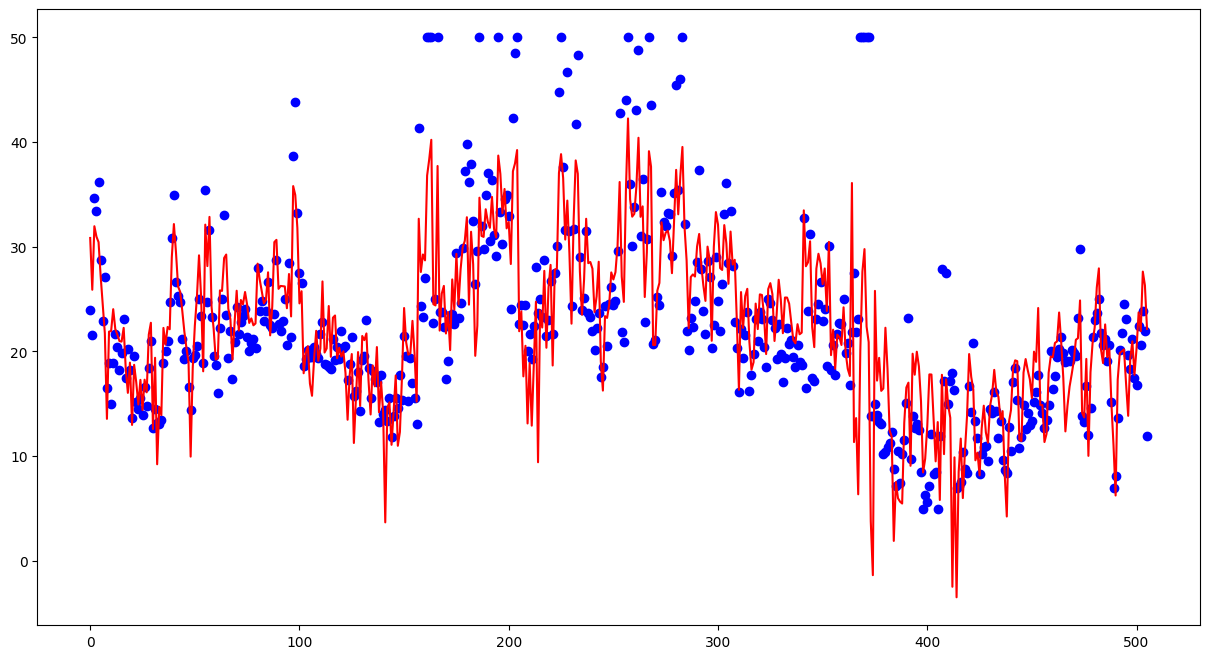

In [15]:
# 只b取 ZN、RM、PTRATIO、B、LSTAT 列做为特征属性
x=house.loc[:,['ZN','RM','PTRATIO','B','LSTAT']]
y=house['target']

#划分训练集与测试集
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

#用训练集生成模型
lr3=linear_model.LinearRegression()
lr3.fit(x_train,y_train)

#用测试集评估模型
score=lr3.score(x_test,y_test)


#用模型预测原特征属性的房价，用于画回归线
Y_pre=lr3.predict(x)
plt.figure(figsize=(15,8))


#画图对比原房价与预测的房价，因X是多维，无法在二维图上绘制，取数据点的序号为X轴
plt.scatter(range(len(Y)),Y,color='blue')            #画原始数据图
plt.plot(range(len(Y_pre)),Y_pre,color='red')        #按模型预测计算的点绘图


print("模型评估得分：",score)